In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [1]:
from data import fraud_dataset

Using backend: pytorch


In [78]:
# Define some constants for the exploration
DATASET_NAME = "yelp" # "amazon" or "yelp"
TRAIN_SIZE = 0.4
VAL_SIZE = 0.1
RANDOM_SEED = 42
FORCE_RELOAD = False

In [81]:
# Load the dataset
fraud_data = fraud_dataset.FraudDataset(
    DATASET_NAME, 
    train_size=TRAIN_SIZE, 
    val_size=VAL_SIZE, 
    random_seed=RANDOM_SEED, 
    force_reload=FORCE_RELOAD
)
graph = fraud_data[0]

Done loading data from cached files.


Node types: ['review']
Edge types: ['net_rsr', 'net_rtr', 'net_rur']
Number of review nodes: 45954
Feature dimension for review nodes: 32
Number of net_rsr edges: 6805486
Number of net_rtr edges: 1147232
Number of net_rur edges: 98630
Maximum degree for net_rsr: 465
Maximum degree for net_rtr: 118
Maximum degree for net_rur: 46


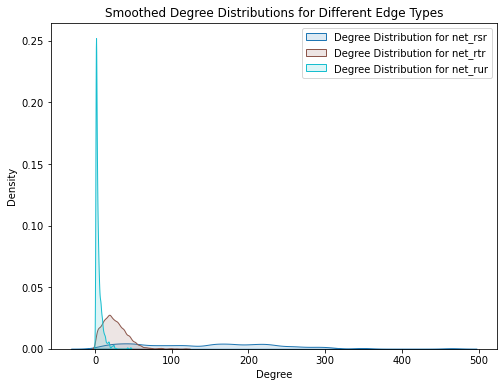

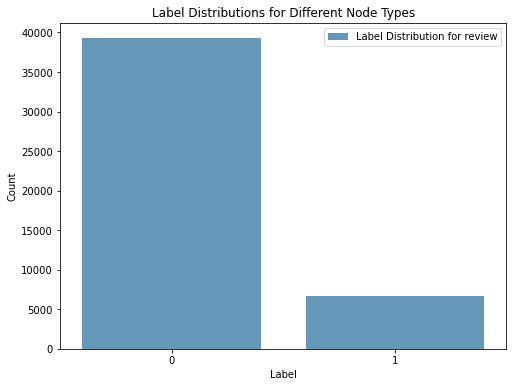

In [84]:
# Print details about the heterogeneous graph
print("Node types:", graph.ntypes)
print("Edge types:", graph.etypes)

# Number of nodes and edges per type
for ntype in graph.ntypes:
    print(f"Number of {ntype} nodes:", graph.num_nodes(ntype))

# Feature dimension
for ntype in graph.ntypes:
    print(f"Feature dimension for {ntype} nodes:", graph.nodes[ntype].data['feature'].shape[1])

# Number of edges per type and maximum degree
for etype in graph.etypes:
    print(f"Number of {etype} edges:", graph.num_edges(etype))

    
# Define a colormap for differentiating the distributions
colors = plt.cm.get_cmap('tab10', len(graph.etypes))

# Compute degree distribution for each edge type
# Set up a single plot
plt.figure(figsize=(8, 6))

# Loop through each edge type and plot its degree distribution
for i, etype in enumerate(graph.etypes):
    _, dst = graph.edges(etype=etype)
    unique, counts = np.unique(dst.numpy(), return_counts=True)
    print(f"Maximum degree for {etype}:", counts.max())
    cut_off = 1000
    
    sns.kdeplot(counts[counts < cut_off], label=f'Degree Distribution for {etype}',
                color=colors(i), log_scale=[False, False], fill=True, alpha=0.15)

# Add plot details
plt.title('Smoothed Degree Distributions for Different Edge Types')
plt.xlabel('Degree')
plt.ylabel('Density')
plt.legend()
plt.show()

# Label distribution
# Set up a single plot
plt.figure(figsize=(8, 6))

# Loop through each node type and plot its label distribution
for i, ntype in enumerate(graph.ntypes):
    labels = graph.nodes[ntype].data['label']
    unique, counts = np.unique(labels.numpy(), return_counts=True)
    
    sns.barplot(x=unique, y=counts, label=f'Label Distribution for {ntype}', color=colors(i), alpha=0.75)

# Add plot details
plt.title('Label Distributions for Different Node Types')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend()

In [70]:
graph.nodes[ntype].data['feature'][0]
graph.nodes[ntype].data.keys()

dict_keys(['test_mask', 'val_mask', 'train_mask', 'feature', 'label'])

In [13]:

g.ndata["feature"].shape

torch.Size([11944, 25])